In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("INFY.csv")
df.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,INFOSYSTCH,EQ,408.00,407.0,407.9,405.00,NaN,407.90,406.48,400,1.625900e+10,NaN,NaN,NaN
1,1996-01-02,INFOSYSTCH,EQ,407.90,407.0,409.0,406.25,NaN,406.25,407.58,400,1.630300e+10,NaN,NaN,NaN
2,1996-01-03,INFOSYSTCH,EQ,406.25,409.0,409.0,409.00,NaN,409.00,409.00,200,8.180000e+09,NaN,NaN,NaN
3,1996-01-04,INFOSYSTCH,EQ,409.00,405.0,407.0,405.00,NaN,406.30,405.65,600,2.433900e+10,NaN,NaN,NaN
4,1996-01-05,INFOSYSTCH,EQ,406.30,401.5,401.5,401.50,NaN,401.50,401.50,100,4.015000e+09,NaN,NaN,NaN


In [3]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
#df.info()

In [6]:
df1 = df[['Date','Close']]
df1.shape

(6348, 2)

In [7]:
pred_days = 15
reward = 10
risk =1
days_shape = 60
eps = 100

df1 = df1.iloc[::-1] 
df1['Xth'] = df1['Close'].shift(-1* pred_days)
print(len(df1.Close))

6348


In [8]:

df1 = df1.reset_index(drop=True)
df1

,Date,Close,Xth
0,2021-07-01,1560.40,1424.30
1,2021-06-30,1580.80,1415.30
2,2021-06-29,1563.05,1412.95
3,2021-06-28,1571.80,1389.65
4,2021-06-25,1574.20,1385.65
...,...,...,...
6343,1996-01-05,401.50,NaN
6344,1996-01-04,406.30,NaN
6345,1996-01-03,409.00,NaN
6346,1996-01-02,406.25,NaN


In [9]:


c1 = []
for i in range(1,days_shape):
    df1['temp'] = df1['Xth'] - df1['Xth'].shift(-1*i)
    df1['temp'] = df1['temp']/df1['Xth']*100
    c1.append(df1['temp'].to_numpy())

print(c1)    
df2 = pd.DataFrame(c1)
df3 = df2.transpose()
df3.head(10)

[array([0.63188935, 0.16604254, 1.64903217, ...,        nan,        nan,
              nan]), array([0.79688268, 1.81233661, 1.93212782, ...,        nan,        nan,
              nan]), array([2.43277399, 2.0949622 , 1.64903217, ...,        nan,        nan,
              nan]), array([2.7136137 , 1.81233661, 2.42754521, ...,        nan,        nan,
              nan]), array([2.43277399, 2.58955698, 1.82242825, ...,        nan,        nan,
              nan]), array([3.2050832 , 1.98544478, 1.35885912, ...,        nan,        nan,
              nan]), array([2.60478832, 1.52264538, 0.55911391, ...,        nan,        nan,
              nan]), array([2.14491329, 0.72422808, 0.75728087, ...,        nan,        nan,
              nan]), array([1.35154111, 0.92206599, 1.11115043, ...,        nan,        nan,
              nan]), array([1.54812891, 1.27534798, 3.63424042, ...,        nan,        nan,
              nan]), array([1.89917854, 3.79424857, 4.59322694, ...,        nan,        na

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,6.353998,4.953310,3.703574,3.756231,5.606263,6.122306,2.618830,2.829460,3.559643,3.471881
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,4.348901,3.091217,3.144210,5.006006,5.525330,1.999576,2.211545,2.946372,2.858051,3.331449
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,2.930040,2.983120,4.848013,5.368201,1.836583,2.048905,2.784953,2.696486,3.170671,4.770162
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,1.356457,3.252618,3.781528,0.190695,0.406577,1.154967,1.065016,1.547152,3.173461,3.878674
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,2.973334,3.503771,-0.097427,0.119078,0.869628,0.779418,1.262945,2.893949,3.601198,4.976004
5,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,2.529414,3.623214,...,3.781528,0.190695,0.406577,1.154967,1.065016,1.547152,3.173461,3.878674,5.249523,4.267262
6,-0.620172,-1.095274,-1.914917,-1.711820,-1.349146,1.236717,2.219563,1.751714,2.854241,3.021071,...,-0.605665,-0.388061,0.366300,0.275632,0.761615,2.400899,3.111740,4.493526,3.503427,2.545969
7,-0.472174,-1.286765,-1.084919,-0.724481,1.845444,2.822232,2.357266,3.452999,3.618800,3.402537,...,0.230681,0.980392,0.890283,1.373270,3.002451,3.708910,5.082180,4.098183,3.146626,5.961649
8,-0.810762,-0.609865,-0.251121,2.306726,3.278924,2.816143,3.906726,4.071749,3.856502,4.617040,...,1.445740,1.356054,1.836771,3.458296,4.161435,5.528251,4.548879,3.601794,6.403587,9.094170
9,0.199281,0.555140,3.092417,4.056795,3.597737,4.679549,4.843244,4.629728,5.384150,6.309384,...,2.149390,2.626241,4.234725,4.932209,6.288032,5.316537,4.377068,7.156329,9.825273,10.800327


In [10]:
df3.shape


(6348, 59)

In [11]:
c2 =df3.to_numpy()
c2

array([[0.63188935, 0.79688268, 2.43277399, ..., 2.82946009, 3.55964333,
        3.47188092],
       [0.16604254, 1.81233661, 2.0949622 , ..., 2.94637179, 2.8580513 ,
        3.33144916],
       [1.64903217, 1.93212782, 1.64903217, ..., 2.69648608, 3.17067129,
        4.77016172],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [12]:
len(c2)


6348

In [13]:
c3 =[]

for i in range(int(len(c2)-days_shape)):
      
    c6 = np.concatenate((c2[i:i+days_shape]))
    
    c3.append(c6)
    
                

In [14]:
c3[1:3]

[array([ 0.16604254,  1.81233661,  2.0949622 , ..., 15.2724482 ,
        14.79735409, 15.60866864]),
 array([ 1.64903217,  1.93212782,  1.64903217, ..., 13.36628145,
        14.19122292, 13.45174836])]

In [15]:
df4 = pd.DataFrame(c3)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,...,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,9.313743,9.059170,9.786522,10.095647,8.859148,11.226679,14.368840,13.459650,15.685347,15.212569
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,8.613822,9.344736,9.655374,8.412820,10.791945,13.949494,13.035851,15.272448,14.797354,15.608669
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,7.822080,8.137936,6.874512,9.293597,12.504180,11.575192,13.849355,13.366281,14.191223,13.451748
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,7.463972,6.191278,8.628112,11.862250,10.926446,13.217294,12.730676,13.561669,12.816770,12.917836
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,4.834055,7.306144,10.587074,9.637731,11.961722,11.468064,12.311081,11.555404,11.657933,11.312372
5,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,2.529414,3.623214,...,8.257226,11.504491,10.564889,12.865036,12.376442,13.210809,12.462886,12.564363,12.222348,11.662344
6,-0.620172,-1.095274,-1.914917,-1.711820,-1.349146,1.236717,2.219563,1.751714,2.854241,3.021071,...,12.373935,11.443564,13.721112,13.237319,14.063489,13.322913,13.423393,13.084738,12.530237,14.156526
7,-0.472174,-1.286765,-1.084919,-0.724481,1.845444,2.822232,2.357266,3.452999,3.618800,3.402537,...,8.792641,11.138367,10.640092,11.490993,10.728248,10.831736,10.482944,9.911844,11.586815,12.341893
8,-0.810762,-0.609865,-0.251121,2.306726,3.278924,2.816143,3.906726,4.071749,3.856502,4.617040,...,8.508287,7.995264,8.871350,8.086030,8.192581,7.833465,7.245462,8.970008,9.747435,10.445935
9,0.199281,0.555140,3.092417,4.056795,3.597737,4.679549,4.843244,4.629728,5.384150,6.309384,...,6.989548,7.875209,7.081305,7.189021,6.825979,6.231549,7.974946,8.760871,9.467007,10.121280


In [16]:
df4.shape

(6288, 3540)

In [17]:
df1.shape

(6348, 4)

In [18]:
aes = df1.shape[0]

In [19]:
df4['Close'] = df1.iloc[:aes]['Close']

df4['Xth'] = df1.iloc[:aes]['Xth']
df4.shape

(6288, 3542)

In [20]:
df3.head(5)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,6.353998,4.953310,3.703574,3.756231,5.606263,6.122306,2.618830,2.829460,3.559643,3.471881
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,4.348901,3.091217,3.144210,5.006006,5.525330,1.999576,2.211545,2.946372,2.858051,3.331449
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,2.930040,2.983120,4.848013,5.368201,1.836583,2.048905,2.784953,2.696486,3.170671,4.770162
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,1.356457,3.252618,3.781528,0.190695,0.406577,1.154967,1.065016,1.547152,3.173461,3.878674
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,2.973334,3.503771,-0.097427,0.119078,0.869628,0.779418,1.262945,2.893949,3.601198,4.976004


In [21]:
df4.shape

(6288, 3542)

In [22]:
df5 = df4.dropna()


In [23]:
df5.shape
        

(6215, 3542)

In [24]:
len(df5[df5[7]>6])

933

In [25]:
len(df5[df5[7]<2])

3744

In [26]:
df6 = df5
df6 = df6.assign(result = lambda x: ((x['Close'] - x['Xth'])/x['Xth']*100)>reward)
    
df6['result'].value_counts()  

False    5341
True      874
Name: result, dtype: int64

In [27]:
for i in range(len(df6.result)):
    if df6['result'][i] == False:
       df6['result'][i] = 0
    else:
       df6['result'][i] = 1
        

C:\Users\abhij\AppData\Local\Temp\ipykernel_5504\4073025108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['result'][i] = 0


In [28]:
df6.result.describe()

count     6215
unique       2
top          0
freq      5341
Name: result, dtype: int64

In [29]:
df6.head()

,0,1,2,3,4,5,6,7,8,9,...,3533,3534,3535,3536,3537,3538,3539,Close,Xth,result
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,10.095647,8.859148,11.226679,14.368840,13.459650,15.685347,15.212569,1560.40,1424.30,0
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,8.412820,10.791945,13.949494,13.035851,15.272448,14.797354,15.608669,1580.80,1415.30,1
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,9.293597,12.504180,11.575192,13.849355,13.366281,14.191223,13.451748,1563.05,1412.95,1
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,11.862250,10.926446,13.217294,12.730676,13.561669,12.816770,12.917836,1571.80,1389.65,1
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,9.637731,11.961722,11.468064,12.311081,11.555404,11.657933,11.312372,1574.20,1385.65,1


In [30]:
df7 = df6.drop(['Close','Xth'],axis=1)
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,3531,3532,3533,3534,3535,3536,3537,3538,3539,result
0,0.631889,0.796883,2.432774,2.713614,2.432774,3.205083,2.604788,2.144913,1.351541,1.548129,...,9.059170,9.786522,10.095647,8.859148,11.226679,14.368840,13.459650,15.685347,15.212569,0
1,0.166043,1.812337,2.094962,1.812337,2.589557,1.985445,1.522645,0.724228,0.922066,1.275348,...,9.344736,9.655374,8.412820,10.791945,13.949494,13.035851,15.272448,14.797354,15.608669,1
2,1.649032,1.932128,1.649032,2.427545,1.822428,1.358859,0.559114,0.757281,1.111150,3.634240,...,8.137936,6.874512,9.293597,12.504180,11.575192,13.849355,13.366281,14.191223,13.451748,1
3,0.287842,0.000000,0.791566,0.176303,-0.295038,-1.108193,-0.906703,-0.546900,2.018494,2.993560,...,6.191278,8.628112,11.862250,10.926446,13.217294,12.730676,13.561669,12.816770,12.917836,1
4,-0.288673,0.505178,-0.111861,-0.584563,-1.400065,-1.197994,-0.837152,1.735648,2.713528,2.248042,...,7.306144,10.587074,9.637731,11.961722,11.468064,12.311081,11.555404,11.657933,11.312372,1


In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [33]:
mass_data = pd.read_csv('X_big_ones_06.csv')

In [34]:
X = mass_data.drop('result',axis='columns')
y = mass_data["result"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
X_train.shape

(13352, 3541)

In [36]:
X_test.shape

(3338, 3541)

In [37]:
X_test.iloc[0].shape

(3541,)

In [38]:
aess = X_test.shape[1]

In [39]:
import numpy as np

X_train1 = np.asarray(X_train).astype(np.float32)
X_test1 = np.asarray(X_test).astype(np.float32)
y_train1 = np.asarray(y_train).astype(np.float32)
y_test1 = np.asarray(y_test).astype(np.float32)

In [40]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(aess,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train1, y_train1, epochs=eps, batch_size=64, validation_data=(X_test1, y_test1))


#model.fit(X_train1, y_train1, epochs=eps)

Epoch 1/100
209/209 [==============================] - 3s 7ms/step - loss: 0.1956 - accuracy: 0.9156 - val_loss: 0.1466 - val_accuracy: 0.9464
Epoch 2/100
209/209 [==============================] - 1s 6ms/step - loss: 0.1283 - accuracy: 0.9461 - val_loss: 0.0944 - val_accuracy: 0.9581
Epoch 3/100
209/209 [==============================] - 1s 6ms/step - loss: 0.1078 - accuracy: 0.9539 - val_loss: 0.0771 - val_accuracy: 0.9685
Epoch 4/100
209/209 [==============================] - 1s 6ms/step - loss: 0.0955 - accuracy: 0.9589 - val_loss: 0.0586 - val_accuracy: 0.9769
Epoch 5/100
209/209 [==============================] - 1s 6ms/step - loss: 0.0909 - accuracy: 0.9631 - val_loss: 0.0507 - val_accuracy: 0.9805
Epoch 6/100
209/209 [==============================] - 1s 6ms/step - loss: 0.0812 - accuracy: 0.9653 - val_loss: 0.0548 - val_accuracy: 0.9835
Epoch 7/100
209/209 [==============================] - 1s 6ms/step - loss: 0.0786 - accuracy: 0.9681 - val_loss: 0.0469 - val_accuracy: 0.9814

Epoch 58/100
209/209 [==============================] - 1s 6ms/step - loss: 0.0294 - accuracy: 0.9885 - val_loss: 0.0200 - val_accuracy: 0.9931
Epoch 59/100
209/209 [==============================] - 1s 6ms/step - loss: 0.0365 - accuracy: 0.9861 - val_loss: 0.0287 - val_accuracy: 0.9895
Epoch 60/100
209/209 [==============================] - 1s 7ms/step - loss: 0.0377 - accuracy: 0.9852 - val_loss: 0.0313 - val_accuracy: 0.9862
Epoch 61/100
209/209 [==============================] - 1s 7ms/step - loss: 0.0351 - accuracy: 0.9867 - val_loss: 0.0300 - val_accuracy: 0.9910
Epoch 62/100
209/209 [==============================] - 1s 7ms/step - loss: 0.0306 - accuracy: 0.9874 - val_loss: 0.0242 - val_accuracy: 0.9919
Epoch 63/100
209/209 [==============================] - 1s 7ms/step - loss: 0.0314 - accuracy: 0.9883 - val_loss: 0.0219 - val_accuracy: 0.9910
Epoch 64/100
209/209 [==============================] - 1s 7ms/step - loss: 0.0302 - accuracy: 0.9878 - val_loss: 0.0282 - val_accuracy:

In [41]:
model.evaluate(X_test1, y_test1)

105/105 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9937


[0.021626796573400497, 0.9937087893486023]

In [42]:
yp = model.predict(X_test)
yp[:5]

105/105 [==============================] - 0s 1ms/step


array([[5.3232514e-05],
       [1.9928800e-01],
       [3.4970686e-05],
       [7.2703295e-04],
       [1.3664737e-04]], dtype=float32)

In [43]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [44]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1801
         1.0       0.99      0.99      0.99      1537

    accuracy                           0.99      3338
   macro avg       0.99      0.99      0.99      3338
weighted avg       0.99      0.99      0.99      3338



Text(95.72222222222221, 0.5, 'Truth')

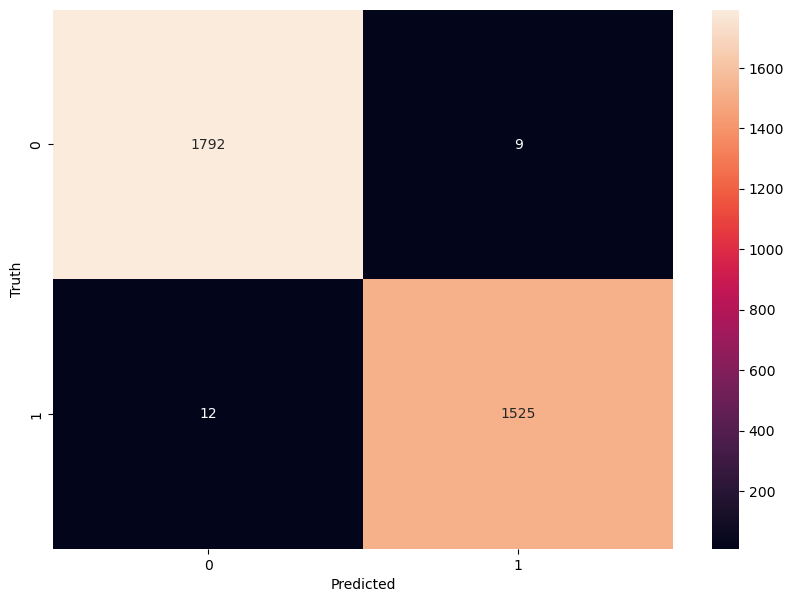

In [45]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test1,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#import joblib

In [ ]:
#joblib.dump(model, 'model33.pkl')